# Notebook for predicting water masses

We first load the necessary libraries.

In [7]:
from joblib import load
import matplotlib.pyplot as plt

Now, we load the model, and define the labels for prediction. 

In [2]:
model = load('model_regr_et_combined.joblib') 
labels = ['EDW','ENACW12', 'WNACW7', 'SPMW', 'SACWT12', 'SACWE12', 'WW', 'AAIW5','AAIW3', 'MW', 'LSW', 'ISOW', 'DSOW', 'CDW', 'WSDW', 'SAIW']

You can modify the following values to obtain the predictions.

In [3]:
Latitude= -57.4997
Longitude= -31.5992
CTDPRS= 347.9
CTDPOT= 1.8694
CTDSAL= 34.587 

Finally, we obtain the predictions.

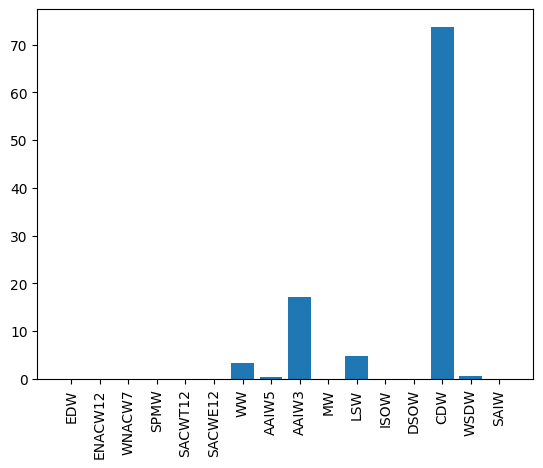

{'EDW': 0.0, 'ENACW12': 0.0, 'WNACW7': 0.0, 'SPMW': 0.0, 'SACWT12': 0.0, 'SACWE12': 0.0, 'WW': 3.3735452299987854, 'AAIW5': 0.37015432438768103, 'AAIW3': 17.17661315962404, 'MW': 0.0, 'LSW': 4.738022273279434, 'ISOW': 0.013882006939834, 'DSOW': 0.0, 'CDW': 73.72299685215647, 'WSDW': 0.6051882175619461, 'SAIW': 0.0}


In [10]:
prediction = model.predict([[Latitude,Longitude,CTDPRS,CTDPOT, CTDSAL]])
probs = prediction[0]
res = {labels[i]: float(probs[i])*100 for i in range(len(labels))}
plt.bar(*zip(*res.items()))
plt.xticks(rotation=90)
plt.show()
print(res)